<a href="https://colab.research.google.com/github/sharunraj14/ICT_Projects/blob/main/unsupervised_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

1. Data Loading and Preview

In [2]:
df = pd.read_csv('Wine_clust.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


3. Preprocessing

In [3]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

4. K-Means Clustering

Finding Optimum Clusters

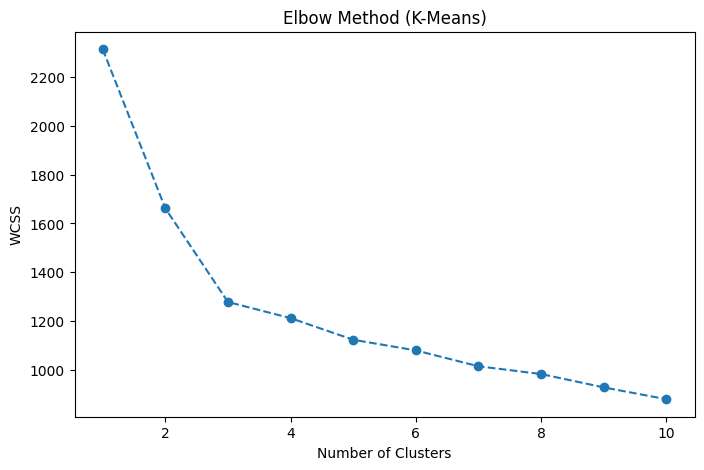

K-Means Silhouette Score: 0.2848589191898987


In [4]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow, optimum k = 3
kmeans_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['KMeans_Labels'] = kmeans_model.fit_predict(scaled_data)
print("K-Means Silhouette Score:", silhouette_score(scaled_data, df['KMeans_Labels']))

5. Hierarchical / Agglomerative Clustering

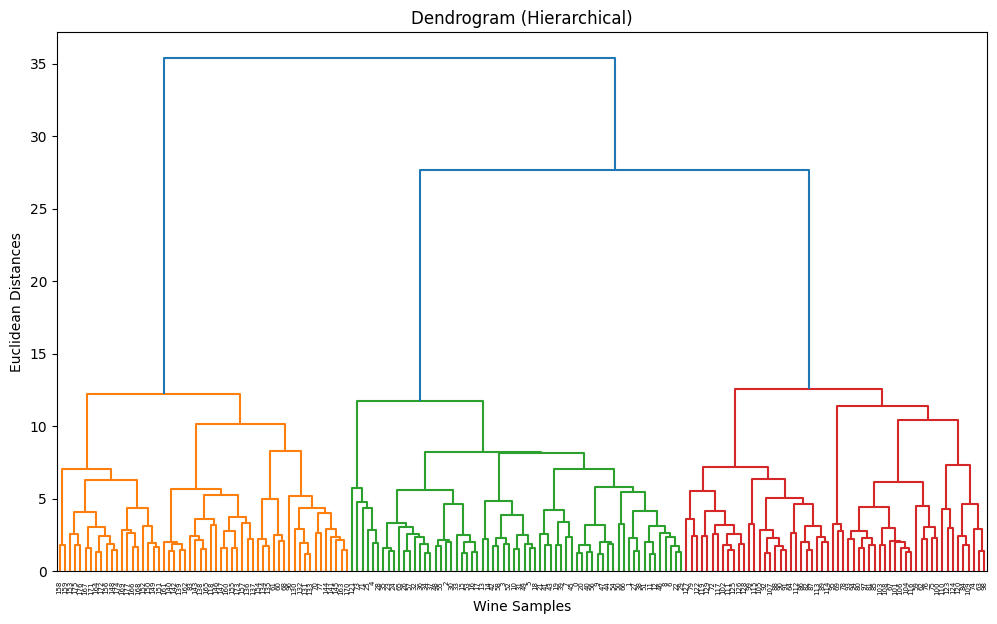

Agglomerative Silhouette Score: 0.2774439826952265


In [5]:
# Dendrogram
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram (Hierarchical)')
plt.xlabel('Wine Samples')
plt.ylabel('Euclidean Distances')
plt.show()

# From dendrogram, optimum clusters = 3
agglo_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Agglo_Labels'] = agglo_model.fit_predict(scaled_data)
print("Agglomerative Silhouette Score:", silhouette_score(scaled_data, df['Agglo_Labels']))

6. DBSCAN Clustering

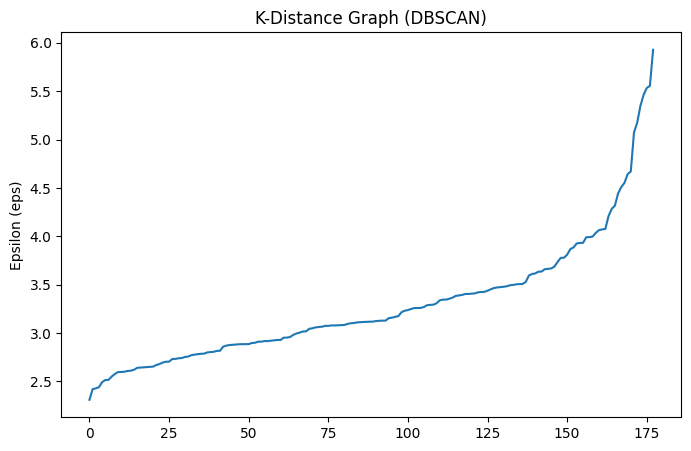

DBSCAN Cluster counts:
 DBSCAN_Labels
 0    149
-1     29
Name: count, dtype: int64


In [6]:
# Finding optimum Epsilon (eps)
neighbors = NearestNeighbors(n_neighbors=26) # Rule of thumb: 2 * dimensions
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, 25], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph (DBSCAN)')
plt.ylabel('Epsilon (eps)')
plt.show()

# Based on graph, choosing eps = 2.5
dbscan = DBSCAN(eps=2.5, min_samples=7)
df['DBSCAN_Labels'] = dbscan.fit_predict(scaled_data)

# Note: -1 labels represent noise/outliers
print("DBSCAN Cluster counts:\n", df['DBSCAN_Labels'].value_counts())